In [1]:
import pandas as pd
import psutil

from freeholdforecast.tasks.etl_ml_task import ETL_ML_Task

pd.options.display.max_columns = 100

task = ETL_ML_Task()


2022-12-28 23:37:56 INFO ETL_ML_Task Initializing task for ohio with run date 2022-07-01
2022-12-28 23:37:56 INFO ETL_ML_Task Train years: 1
2022-12-28 23:37:56 INFO ETL_ML_Task Train dates: 2021-05-01 to 2022-05-01
2022-12-28 23:37:56 INFO ETL_ML_Task Test dates: 2022-07-01 to 2022-07-01


In [2]:
task._get_df_raw()


2022-12-28 23:37:56 INFO ETL_ML_Task Loading existing raw data
2022-12-28 23:38:00 INFO ETL_ML_Task Total parcels: 491271
2022-12-28 23:38:00 INFO ETL_ML_Task Total sales: 1049182


In [3]:
task._get_df_encoded()


2022-12-28 23:38:00 INFO ETL_ML_Task Loading existing encoded data


In [4]:
task._get_df_prepared()


2022-12-28 23:38:00 INFO ETL_ML_Task Loading existing prepared data
2022-12-28 23:38:01 INFO ETL_ML_Task Splitting data


In [5]:
task.df_prepared.describe().astype(object)


,sale_in_3_months,next_sale_amount,month,months_since_last_sale,Parid,Year of Sale,Month of Sale,Day of Sale,Owner Name 1,House #,Street Name,Street Suffix,Deed Type,Valid Sale,Sale Price,Building Value,Land Value,Tax District,Property Class,county
count,9152389.0,334224.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0,9152389.0
mean,0.01242,404933.693837,7.055687,138.699808,245177.739724,42.016242,9.710435,14.582559,329369.919852,17961.730133,13134.133703,40.494614,29.851122,12.592787,31865.166189,22826.025614,13902.516689,105.159155,119.161526,1.316413
std,0.110751,1290695.101744,3.082722,103.242848,141758.67816,8.628431,5.656188,9.367556,191896.305577,9753.168324,7364.599509,27.145017,23.746458,8.58862,22013.031089,19295.697322,7090.130296,65.549979,28.945818,0.859536
min,0.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,143000.0,5.0,47.0,122377.0,36.0,5.0,6.0,162248.0,9958.0,6844.0,25.0,3.0,1.0,11569.0,3779.0,8818.0,45.0,104.0,0.0
50%,0.0,220500.0,7.0,123.0,245061.0,43.0,10.0,14.0,329594.0,16780.0,13364.0,29.0,43.0,20.0,28763.0,17631.0,13796.0,91.0,108.0,2.0
75%,0.0,349900.0,10.0,211.0,367679.0,50.0,14.0,23.0,496528.0,25377.0,19409.0,66.0,53.0,20.0,52878.0,43625.0,18960.0,166.0,148.0,2.0
max,1.0,46300000.0,12.0,563.0,491270.0,54.0,20.0,30.0,644074.0,35598.0,25740.0,105.0,56.0,22.0,69770.0,52081.0,27754.0,226.0,149.0,2.0


In [6]:
task._train_models()


2022-12-28 23:38:06 INFO ETL_ML_Task Total fit minutes: 90
2022-12-28 23:38:06 INFO ETL_ML_Task Job fit minutes: 15
2022-12-28 23:38:06 INFO ETL_ML_Task Job memory limit (GB): 2.5
2022-12-28 23:38:06 INFO ETL_ML_Task Initialize AutoML for sale_in_3_months with 10 jobs
2022-12-28 23:38:07 INFO ETL_ML_Task Train labels: 78731/5722347 (1.38%)
2022-12-28 23:38:10 INFO ETL_ML_Task Train labels resampled: 78731/866041 (9.09%)
2022-12-28 23:38:10 INFO ETL_ML_Task Test labels: 4683/449158 (1.04%)
2022-12-28 23:38:10 INFO ETL_ML_Task Initialize AutoML for next_sale_amount with 2 jobs
2022-12-28 23:38:11 INFO ETL_ML_Task Fitting model for next_sale_amount
2022-12-28 23:38:11 INFO ETL_ML_Task Fitting model for sale_in_3_months


/home/vscode/.local/share/virtualenvs/freehold-forecast-zrIN4e5_/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41511 instead
  warnings.warn(


[WARNING] [2022-12-28 23:38:26,850:Client-EnsembleBuilder] No runs were available to build an ensemble from
2022-12-29 01:08:12 INFO ETL_ML_Task Saving model for next_sale_amount
2022-12-29 01:08:16 INFO ETL_ML_Task Saving model for sale_in_3_months


/home/vscode/.local/share/virtualenvs/freehold-forecast-zrIN4e5_/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/home/vscode/.local/share/virtualenvs/freehold-forecast-zrIN4e5_/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


2022-12-29 01:10:41 INFO ETL_ML_Task Model sale_in_3_months auto-sklearn results:
  Dataset name: b0a6e27c-8708-11ed-b16e-0242ac110002
  Metric: f1
  Best validation score: 0.827020
  Number of target algorithm runs: 133
  Number of successful target algorithm runs: 110
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 13
  Number of target algorithms that exceeded the memory limit: 9

2022-12-29 01:10:41 INFO ETL_ML_Task Metrics with training data:
2022-12-29 01:12:35 INFO ETL_ML_Task Pred labels: 78092/866041 (9.02%)
2022-12-29 01:12:36 INFO ETL_ML_Task Precision: 0.95
2022-12-29 01:12:36 INFO ETL_ML_Task Average precision: 0.90
2022-12-29 01:12:36 INFO ETL_ML_Task ROC AUC: 0.97
2022-12-29 01:12:37 INFO ETL_ML_Task Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    787310
           1       0.95      0.94      0.94     78731

    accuracy                   

In [7]:
task._get_df_predictions()


2022-12-29 01:14:16 INFO ETL_ML_Task Creating predictions
2022-12-29 01:14:16 INFO ETL_ML_Task Loading predictions for sale_in_3_months
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.4: 1369
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.5: 1141
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.6: 801
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.7: 276
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.8: 44
2022-12-29 01:15:25 INFO ETL_ML_Task Predicted with proba 0.9: 1
2022-12-29 01:15:25 INFO ETL_ML_Task Loading predictions for next_sale_amount
2022-12-29 01:15:46 INFO ETL_ML_Task MAPE for next_sale_amount: 0.14


/workspaces/freehold-forecast/freeholdforecast/tasks/etl_ml_task.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["y_pred_train"] = y_pred_train


2022-12-29 01:15:46 INFO ETL_ML_Task Final accuracy for sale_in_3_months: 0.943
2022-12-29 01:15:46 INFO ETL_ML_Task Final accuracy for next_sale_amount: 0.960


In [8]:
task.df_predictions.sort_values(by="pred_next_sale_amount")


,Parid,Year of Sale,Month of Sale,Day of Sale,Owner Name 1,House #,Street Name,Street Suffix,Deed Type,Valid Sale,Sale Price,Building Value,Land Value,Tax District,Property Class,county,pred_next_sale_amount_lower,pred_next_sale_amount_upper,pred_sale_in_3_months,pred_next_sale_amount,next_sale_amount,sale_in_3_months,months_since_last_sale,month,pred_next_sale_amount_error
1923810,P6461038000029,1989,2,1,RAINS COYT F &,248.0,FAIRVIEW,AVE,2,8,27200.0,51930.0,6970.0,P64,R,ohio-butler,55244.557761,7.393280e+04,0.841269,64588.678833,62000.0,1,401,7,0.041753
4078557,6510050018300,1998,08,24,BOESE GREGORY W,1802,LINCOLN,AV,WD,N,39900,41100.0,3500.0,152,510,ohio-hamilton,55907.929360,7.482058e+04,0.680730,65364.253784,55200.0,1,287,7,0.184135
8026529,1790077011200,2014,01,29,FEDERAL HOME LOAN MORTGAG,4547,MIDLAND,AVE,SH,N,20000,1100.0,7400.0,1,510,ohio-hamilton,56046.871837,7.500652e+04,0.716647,65526.697134,65000.0,1,102,7,0.008103
3033560,192410D076.,2008,8,1,THREE WELLS LLC,1086.0,U S ROUTE 50,nan,2,5,65000.0,118300,39900,19,R,ohio-clermont,56389.771202,7.546542e+04,0.591078,65927.594849,66200.0,1,167,7,0.004115
7281615,5700170002600,2019,08,9,HAZELWOOD JEREMY,9592,BROWER,RD,QU,Y,5000,50320.0,14580.0,221,510,ohio-hamilton,56540.624809,7.566730e+04,0.667465,66103.963989,60000.0,1,35,7,0.101733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783180,0530002002400,2019,12,13,LAFOSSE-MARIN ISABELLE,2136,EAST HILL,AVE,WD,Y,839000,492100.0,187200.0,1,510,ohio-hamilton,779846.088659,1.043654e+06,0.763511,911750.054688,930000.0,1,31,7,0.019624
5188290,6030001013500,2001,12,17,GOOD STEVEN & LISA,,ROSS,AV,WD,N,125000,0.0,120600.0,211,500,ohio-hamilton,801326.458875,1.072401e+06,0.540186,936863.636719,935000.0,1,247,7,0.001993
4718990,5930001010500,2015,05,1,RATH BAILE LLC,1936,ADAMS,RD,TR,Y,157000,118990.0,28750.0,124,401,ohio-hamilton,801992.173650,1.073292e+06,0.686304,937641.951172,940000.0,1,86,7,0.002509
4966940,5930001000900,2014,08,8,RATH BAILE LLC,1930,ADAMS,RD,WD,Y,167000,117650.0,31250.0,124,401,ohio-hamilton,812442.617794,1.087277e+06,0.655542,949859.994141,940000.0,1,95,7,0.010489


<IPython.core.display.Javascript object>


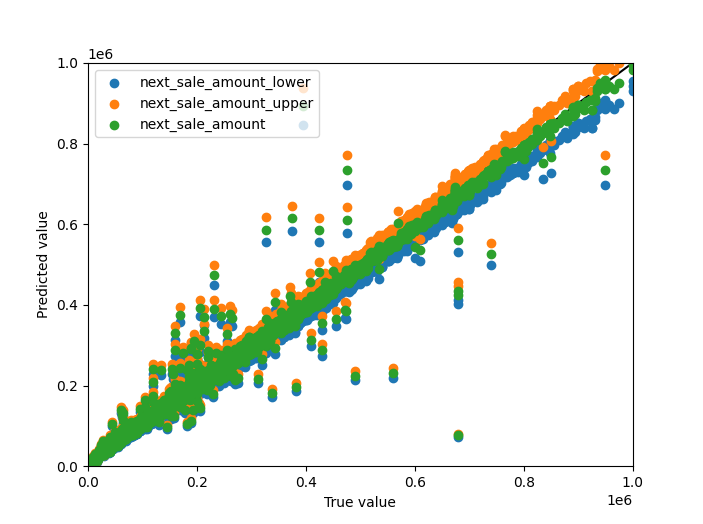

2022-12-29 01:16:02 INFO ETL_ML_Task Metrics for next_sale_amount
2022-12-29 01:16:02 INFO ETL_ML_Task MAE: 10358.62
2022-12-29 01:16:02 INFO ETL_ML_Task MAE/MT: 0.03
2022-12-29 01:16:02 INFO ETL_ML_Task MPE: -0.03
2022-12-29 01:16:02 INFO ETL_ML_Task MAPE: 0.05
2022-12-29 01:16:02 INFO ETL_ML_Task SMAPE: 4.66
2022-12-29 01:16:02 INFO ETL_ML_Task Pred interval: 73030.48


/tmp/ipykernel_12532/3809190125.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["y_true"] = y_true
/tmp/ipykernel_12532/3809190125.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["y_pred"] = y_pred
/tmp/ipykernel_12532/3809190125.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [9]:
import matplotlib.pyplot as plt
import mlflow
import numpy as np

from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true))

def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def get_prediction_interval(y_true, y_pred, pi=0.9):
    sum_errs = np.sum((y_true - y_pred)**2)
    stdev = np.sqrt(1 / (len(y_true) - 2) * sum_errs)
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    return z_score * stdev

%matplotlib notebook

sale_in_column = "sale_in_3_months"
label_name = "next_sale_amount"

# for label_index, label_name in enumerate(task.regression_label_names):
# df_temp = task.df_train.loc[task.df_train[label_name].notna()]
df_temp = task.df_test.loc[task.df_test[label_name].notna()]

total_plots = len(task.regression_label_names)
    
if len(df_temp) > 0:
    fig, axs = plt.subplots(total_plots)
    
    X_temp = df_temp.drop(columns=task.label_names).to_numpy()
    y_true = df_temp[label_name].values

    model = mlflow.sklearn.load_model(task.model_directories[sale_in_column])
    y_pred_sale_in_months = model.predict(X_temp)

    model = mlflow.sklearn.load_model(task.model_directories[label_name])
    y_pred = model.predict(X_temp)

    y_mape = np.abs((y_true - y_pred) / y_true)
    y_mape_plow = np.percentile(y_mape, 1)
    y_mape_phigh = np.percentile(y_mape, 99)

    df_temp["y_true"] = y_true
    df_temp["y_pred"] = y_pred
    df_temp["y_mape"] = y_mape

    df_temp = df_temp.loc[(df_temp.y_mape > y_mape_plow) & (df_temp.y_mape < y_mape_phigh)]

    y_true = df_temp["y_true"]
    y_pred = df_temp["y_pred"]

    task.logger.info(f"Metrics for {label_name}")

    mae_value = mean_absolute_error(y_true, y_pred)
    task.logger.info(f"MAE: {mae_value:.2f}")

    maemt_value = mae_value / np.mean(y_true)
    task.logger.info(f"MAE/MT: {maemt_value:.2f}")

    mpe_value = mean_percentage_error(y_true, y_pred)
    task.logger.info(f"MPE: {mpe_value:.2f}")

    mape_value = mean_absolute_percentage_error(y_true, y_pred)
    task.logger.info(f"MAPE: {mape_value:.2f}")

    smape_value = symmetric_mean_absolute_percentage_error(y_true, y_pred)
    task.logger.info(f"SMAPE: {smape_value:.2f}")

    prediction_interval = get_prediction_interval(y_true, y_pred)
    task.logger.info(f"Pred interval: {prediction_interval:.2f}")

    y_pred_interval = df_temp.y_pred * mape_value
    y_pred_lower = y_pred - y_pred_interval
    y_pred_upper = y_pred + y_pred_interval

    if label_name == "next_sale_amount":
        limit_value = 1000000
    elif label_name == "next_sale_months":
        limit_value = 18

#     limit_value = max(y_true + y_pred)

    plot_min_max = [0, limit_value]
    axs_plot = axs if total_plots == 1 else axs[label_name]
    axs_plot.plot(plot_min_max, plot_min_max, c="k", zorder=0)
    axs_plot.scatter(y_true, y_pred_lower, label=f"{label_name}_lower")
    axs_plot.scatter(y_true, y_pred_upper, label=f"{label_name}_upper")
    axs_plot.scatter(y_true, y_pred, label=label_name)
    axs_plot.set_xlim(0, limit_value)
    axs_plot.set_ylim(0, limit_value)

    axs_plot.set_xlabel("True value")
    axs_plot.set_ylabel("Predicted value")
    axs_plot.legend()
    
    plt.show()


/home/vscode/.local/share/virtualenvs/freehold-forecast-zrIN4e5_/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<IPython.core.display.Javascript object>


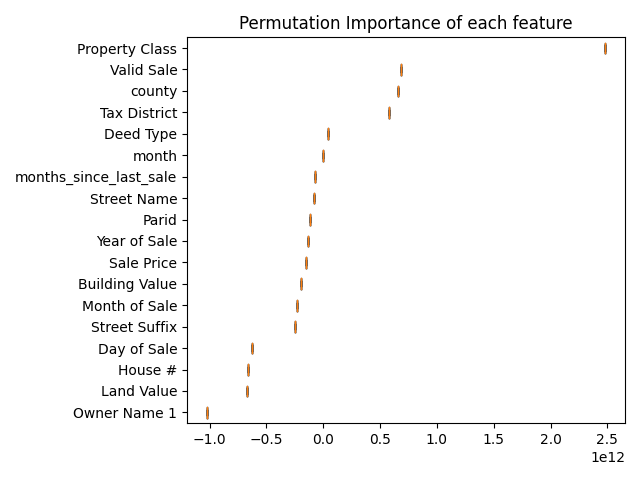

['Property Class', 'Valid Sale', 'county', 'Tax District', 'Deed Type', 'month', 'months_since_last_sale', 'Street Name', 'Parid', 'Year of Sale', 'Sale Price', 'Building Value', 'Month of Sale', 'Street Suffix', 'Day of Sale', 'House #', 'Land Value', 'Owner Name 1']


In [10]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance

# df_temp = task.df_train.copy()
df_temp = task.df_test.copy()

if len(task.df_test) > 0:
    train_columns = list(df_temp.drop(columns=task.label_names).columns)
    X_temp = df_temp[train_columns].to_numpy()
    y_temp = df_temp[sale_in_column].values
    
    X_temp, y_temp= task.rus.fit_resample(X_temp, y_temp)
    result = permutation_importance(model, X_temp, y_temp, n_repeats=1, n_jobs=4)

    fig, ax = plt.subplots()
    sorted_idx = result.importances_mean.argsort()
    ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=[train_columns[i] for i in sorted_idx])
    ax.set_title("Permutation Importance of each feature")
    fig.tight_layout()
    plt.show()

    columns = [train_columns[i] for i in sorted_idx]
    columns.reverse()
    # columns.sort()
    print(columns)
